In [1]:
!pip install contractions

     |████████████████████████████████| 327kB 6.5MB/s 
     |████████████████████████████████| 245kB 27.0MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp36-cp36m-linux_x86_64.whl size=84344 sha256=877f8c541ad3077a53e49115484e665b6ec6cc06c574da84d461f204af7e3bac
  Stored in directory: /root/.cache/pip/wheels/e4/ab/f7/cb39270df8f6126f3dd4c33d302357167086db460968cfc80c
Successfully built pyahocorasick


In [2]:
#install libraries
import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                   
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.
nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
# Loading data into pandas dataframe
data = pd.read_csv('/content/drive/My Drive/Tweets.csv')

In [4]:
data.shape                                               # print shape of data.

(14640, 15)

In [5]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
# Drop columns other than airline_sentiment,text
df = data.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis=1)

In [7]:
df.shape

(14640, 2)

In [8]:
# Check first 5 rows of dataframe.
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [9]:
# Row of data.
pd.set_option('display.max_colwidth', None) # It will enable the entire row visible with truncation of the text. (We can see full text.)
df.loc[[3]]

,airline_sentiment,text
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"


In [10]:
#remove html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df['text'] = df['text'].apply(lambda x: strip_html(x))
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [11]:
df.loc[[257]]

,airline_sentiment,text
257,neutral,@VirginAmerica BIG Love/gratitude.mpower w/ http://t.co/1AGR9knCpf weRin #OSCARS2105 VIPswagbags@ #AvalonHollywood http://t.co/ybMbGs0dHn


In [12]:
# Removal of the http link using Regular Expression.
for i, row in df.iterrows():
    clean_text = re.sub(r"http\S+", "", df.at[i, 'text'])
    df.at[i,'text'] = clean_text
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [13]:
df.loc[[257]]

,airline_sentiment,text
257,neutral,@VirginAmerica BIG Love/gratitude.mpower w/ weRin #OSCARS2105 VIPswagbags@ #AvalonHollywood


In [14]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

df['text'] = df['text'].apply(lambda x: replace_contractions(x))
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [15]:
df.loc[[242]]

,airline_sentiment,text
242,negative,"@VirginAmerica the CSS on your site is a 404 right now, please fix. Site unusable."


In [16]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df['text'] = df['text'].apply(lambda x: remove_numbers(x))
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [17]:
df.loc[[242]]

,airline_sentiment,text
242,negative,"@VirginAmerica the CSS on your site is a right now, please fix. Site unusable."


In [18]:
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [19]:
df.head()                                                                    # Look at how tokenized data looks.

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [20]:
# define stop words
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))           

In [21]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

In [22]:
# Iterate the remove_stopwords funtion over whole data.
for i, row in df.iterrows():
    words = df.at[i, 'text']
    words = remove_stopwords(words)
    df.at[i,'text'] = words
df.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, added, commercials, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, not, today, ..., Must, mean, I, need, take, another, trip, !]"
3,negative,"[@, VirginAmerica, really, aggressive, blast, obnoxious, ``, entertainment, '', guests, ', faces, &, little, recourse]"
4,negative,"[@, VirginAmerica, really, big, bad, thing]"


In [23]:
## Remove Special characters
import re
def remove_special_characters(words):
    new_words = []
    for word in words:
        new_word = re.sub('[^A-Za-z0-9]+', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [24]:
# Iterate the remove_special_characters funtion over whole data.
for i, row in df.iterrows():
    words = df.at[i, 'text']
    words = remove_special_characters(words)
    df.at[i,'text'] = words
df.head()

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, added, commercials, experience, tacky]"
2,neutral,"[VirginAmerica, I, not, today, Must, mean, I, need, take, another, trip]"
3,negative,"[VirginAmerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]"
4,negative,"[VirginAmerica, really, big, bad, thing]"


In [25]:
## Remove Punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [26]:
# Iterate the remove_punctuation funtion over whole data.
for i, row in df.iterrows():
    words = df.at[i, 'text']
    words = remove_punctuation(words)
    df.at[i,'text'] = words
df.head()

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, added, commercials, experience, tacky]"
2,neutral,"[VirginAmerica, I, not, today, Must, mean, I, need, take, another, trip]"
3,negative,"[VirginAmerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]"
4,negative,"[VirginAmerica, really, big, bad, thing]"


In [27]:
## cunvert to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [28]:
# Iterate the to_lowercase funtion over whole data.
for i, row in df.iterrows():
    words = df.at[i, 'text']
    words = to_lowercase(words)
    df.at[i,'text'] = words
df.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercials, experience, tacky]"
2,neutral,"[virginamerica, i, not, today, must, mean, i, need, take, another, trip]"
3,negative,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]"
4,negative,"[virginamerica, really, big, bad, thing]"


In [29]:
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [30]:
# Stemming
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

In [31]:
# Lemmatization
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

In [32]:
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas

In [33]:
df['lemma'] = ''
df['stem'] = ''

for i, row in df.iterrows():
    words = df.at[i, 'text']
    stems, lemmas = stem_and_lemmatize(words)
    df.at[i,'stem'] = stems
    df.at[i, 'lemma'] = lemmas
df.head()

,airline_sentiment,text,lemma,stem
0,neutral,"[virginamerica, what, dhepburn, said]","[virginamerica, what, dhepburn, say]","[virginameric, what, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercials, experience, tacky]","[virginamerica, plus, add, commercials, experience, tacky]","[virginameric, plu, ad, commerc, expery, tacky]"
2,neutral,"[virginamerica, i, not, today, must, mean, i, need, take, another, trip]","[virginamerica, i, not, today, must, mean, i, need, take, another, trip]","[virginameric, i, not, today, must, mean, i, nee, tak, anoth, trip]"
3,negative,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]","[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, face, little, recourse]","[virginameric, real, aggress, blast, obnoxy, entertain, guest, fac, littl, recours]"
4,negative,"[virginamerica, really, big, bad, thing]","[virginamerica, really, big, bad, thing]","[virginameric, real, big, bad, thing]"


In [34]:
df = df.drop(['lemma', 'stem'], axis=1)

In [35]:
# Detokenize cleaned dataframe for vectorizing
df['text'] = df['text'].str.join(" ")
df.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus added commercials experience tacky
2,neutral,virginamerica i not today must mean i need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests faces little recourse
4,negative,virginamerica really big bad thing


In [36]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(df['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [37]:
data_features.shape

(14640, 1000)

In [38]:
labels = df['airline_sentiment']
labels = labels.astype('str')

In [39]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [40]:
X_test.shape

(4392, 1000)

In [41]:
y_train.shape

(10248,)

In [42]:
y_test.shape

(4392,)

In [43]:
X_train.shape

(10248, 1000)

In [44]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7030737704918033


In [45]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

[[2463  242  109]
 [ 369  423   92]
 [ 183  116  395]]


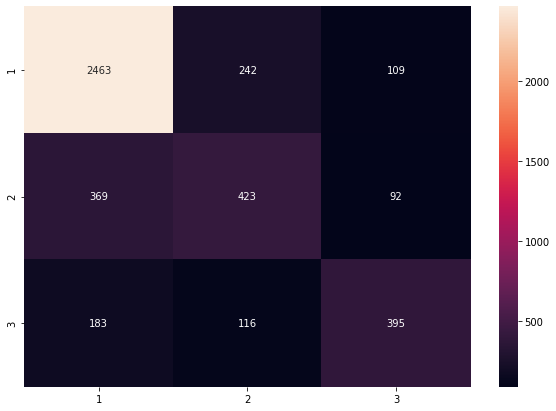

In [46]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [47]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 1000)

In [48]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7046448087431695


In [49]:
result = forest.predict(X_test)

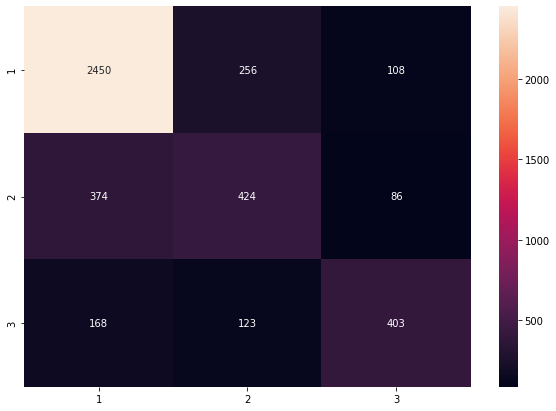

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Summary:

We used dataset which has reviews in text format and their sentiments (nutral,negative,positive).

The goal was to build a model for text-classification.
We Pre-processed the data using variuos techniques and libraries.

After building the classification model, we predicted the result for the test data.

After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.

We use CountVectorizer and Tfidf Vectorizer and applied random forest model, both provided similar results in this project.

One more way to increase accuracy is to use different variations of Pre-processing techniques.